In [1]:
import re
import numpy as np
import pandas as pd
from math import * 
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline 

In [2]:
#for i in range(len(prices)):
    #prices[i] = prices[i].replace(',', '')
    #prices[i] = prices[i].strip('$')
    #prices[i] = float(prices[i])
   

## Calendar Data 

In [3]:
time_data = pd.read_csv('Airbnb_data/calendar.csv', delimiter=',')

In [4]:
# Regex the price and generate log(price)
time_data['price'] = time_data['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)
time_data['log_price'] = np.log(time_data['price'].values)

In [5]:
time_data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,log_price
0,225224,2019-02-09,t,105.0,$105.00,1,365,4.65396
1,225224,2019-02-10,t,105.0,$105.00,1,365,4.65396
2,225224,2019-02-11,t,105.0,$105.00,1,365,4.65396
3,225224,2019-02-12,t,105.0,$105.00,1,365,4.65396
4,225224,2019-02-13,t,105.0,$105.00,1,365,4.65396


In [6]:
time_data.size

17972600

In [7]:
# Only consider data for which there is data
nan_adjusted = time_data[np.isfinite(time_data['log_price'])]

In [8]:
#Still left with a reasonable amount of observations
nan_adjusted.size

17972600

In [9]:
# Group by listing_id, then find each listing id's average price
grouped = nan_adjusted.groupby(['listing_id'], as_index = False)

means = grouped['price'].mean().values
log_means = grouped['log_price'].mean().values

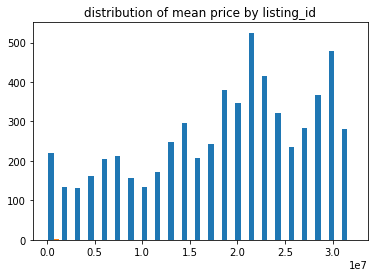

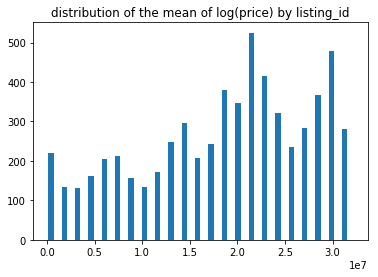

In [19]:

plt.hist(means, bins='auto')  # arguments are passed to np.histogram
plt.title("distribution of mean price by listing_id")
plt.show()

plt.hist(log_means, bins='auto')  # arguments are passed to np.histogram
plt.title("distribution of the mean of log(price) by listing_id")
plt.show()

In [20]:
#Goals: 
# 1)Get the average price for each specific listing [done]
# 2)Compute the distance between each day's price and the average price [done]
# 3)Visualize spikes [done]
# 4)For each day, check the change in price [done]

In [21]:
# Find high demand dates by checking for positive distance between a listings average price and it's current price.
# For these purposes, high demand is categorized as a date which experienced, on average, properties being 
# priced above their average list price

In [23]:
print ("number of unique properties:", len(nan_adjusted['listing_id'].unique()))

number of unique properties: 6155


In [28]:
# Let's sort to make things easier on pattern matching algorithm
#df.sort_values(by='col1', ascending=False)
nan_adjusted.sort_values(by=['listing_id'], inplace=True)
time_data.sort_values(by=['listing_id'], inplace=True)

In [29]:
mean_df = grouped.mean()
mean_df['listing_id']

0           3781
1           5506
2           6695
3           6976
4           8789
5           8792
6           9765
7           9824
8           9827
9           9855
10          9857
11          9858
12          9859
13          9860
14          9870
15         10730
16         10811
17         10813
18         10986
19         13589
20         13592
21         18711
22         21891
23         22208
24         22354
25         23370
26         23668
27         24240
28         25142
29         25418
          ...   
6125    32116807
6126    32125673
6127    32127951
6128    32133411
6129    32133771
6130    32138377
6131    32141341
6132    32147828
6133    32155120
6134    32158419
6135    32161143
6136    32162031
6137    32163609
6138    32163985
6139    32168098
6140    32172713
6141    32180329
6142    32183321
6143    32188679
6144    32195225
6145    32196121
6146    32197096
6147    32202426
6148    32213220
6149    32223560
6150    32234660
6151    32238109
6152    322412

In [30]:
# Maybe I need to reset the index, who the hell knows if I'll use this later
nan_adjusted.reset_index(inplace=True)

In [31]:
# Initialize an empty column for the price differences 
nan_adjusted['price_diff'] = 0


In [46]:
nan_adjusted['listing_id'].count()/1000

2246.575

In [71]:
i=729
nan_adjusted.iloc[i]['price_diff'] = nan_adjusted.iloc[i]['price'] - mean_df.iloc[nan_adjusted.iloc[i]['listing_id']]['price']
print(nan_adjusted.iloc[i]['price_diff'])   

0


/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
for i in range(0,729):
    nan_adjusted.iloc[i]['price_diff'] = nan_adjusted.iloc[i]['price'] - mean_df.iloc[nan_adjusted.iloc[i]['listing_id']]['price']
    
    

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
# Subset dataframe of averages for left-merge
mean_df_new = mean_df[['listing_id','price']]


,listing_id,price
0,3781,125.761644
1,5506,218.920548
2,6695,302.800000
3,6976,272.287671
4,8789,208.901370
5,8792,139.947945
6,9765,296.419178
7,9824,229.501370
8,9827,256.534247
9,9855,184.808219


In [95]:
# Left-Merge
new = nan_adjusted.merge(mean_df_new,how='left', left_on='listing_id', right_on='listing_id')

In [96]:
# Compute price differences 
new['price_diff'] = new['price_x'] - new['price_y']


In [97]:
# Convert dates to datetime
dates = pd.to_datetime(new['date'].values)


In [98]:
# Add new datetime object
new['datetime'] = dates


In [102]:
# Groupby datetime, get average price difference
final = new.groupby(['datetime'], as_index = False)
final_sums = final['price_diff'].mean()
final_sums

,datetime,price_diff
0,2019-02-09,-67.997609
1,2019-02-10,-76.835627
2,2019-02-11,-77.609307
3,2019-02-12,-77.196309
4,2019-02-13,-76.648462
5,2019-02-14,-74.376976
6,2019-02-15,-65.430916
7,2019-02-16,-62.551955
8,2019-02-17,-70.998422
9,2019-02-18,-74.189323


In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
plt.bar(final['datetime'], final['price_diff'], align='center', alpha=0.5)

In [109]:
from sklearn import preprocessing
import numpy as np
max_abs_scaler = preprocessing.MaxAbsScaler()
final_sums['price_diff'] = max_abs_scaler.fit_transform(final_sums['price_diff'])
final_sums['price_diff'] 


ValueError: Expected 2D array, got 1D array instead:
array=[-2.3672372  -2.67491986 -2.70185439 -2.68747649 -2.66840398 -2.5893255
 -2.27788152 -2.17765474 -2.47170609 -2.58279266 -2.61670122 -2.6082057
 -2.55275291 -2.28281367 -2.25693118 -2.51604457 -2.54747573 -2.55745316
 -2.56050182 -2.39677356 -1.78198519 -1.55773058 -1.67444501 -1.67329682
 -1.66756149 -1.69246547 -1.58027596 -1.45608977 -1.45481148 -1.77377247
 -1.79910066 -1.82118789 -1.82427614 -1.30486158 -0.53334159 -0.27072139
 -0.80233625 -1.24604904 -1.50899163 -1.64670165 -1.57812097 -1.2943355
 -1.2248159  -1.50877105 -1.53402005 -1.49709677 -1.08470202 -0.65035013
 -0.17295503 -0.21933537 -0.96448644 -1.12750768 -1.08984345 -0.86468952
 -0.64009555 -0.43353901 -0.41560905 -0.93247269 -1.0336893  -0.97745031
 -0.83528326 -0.30216387  2.11822812  2.68665878  2.56098502  2.3667419
  0.23244873 -0.2909534  -0.32864591 -0.48209131 -0.50232332 -0.89754604
 -0.86086032 -0.76492654 -0.76955327 -0.72101794 -0.48710831 -0.39218698
 -0.51187654 -0.4959432  -0.32073863 -0.17866208  0.25930974  0.34649347
  0.25902128 -0.25878694 -0.24371333 -0.02648931  0.25206988  0.3566123
  0.57379107  1.03397454  0.64685142  0.51081562  0.62653457  0.19866462
  1.14006674  1.81763261  2.45572993  2.07125954  1.5777105   1.31705299
  1.19988041  0.8805348   0.94595936  1.01754346  0.59299932  0.51808376
  0.56385323  0.65016592  0.46921471  0.65696459  0.61183992  0.36198563
  0.47986522  0.79929002  0.94749218  1.20735217  1.60674346  1.23164529
  0.23711505  0.17418485  0.10685982  0.35262472  0.32834857  0.34217218
  0.44516481  0.08421264  0.00896337  0.29643664  0.4663018   0.61904018
  0.62118386  0.81886026  0.20042933  0.33397643  0.35089394  0.39662948
  0.28017524  0.74912007  0.70898411  0.12441648  0.27096139  0.33617101
  0.46656199  0.62327097  0.99925716  1.06392945  0.5447977   0.54454883
  0.64817495  0.67499071  0.78976508  1.2694283   1.25545763  0.60159099
  0.54131352  0.83900743  0.5893398   0.97975479  1.06495322  1.08827348
  0.64070319  0.63325406  0.76981022  0.66908004  1.01131039  1.27695662
  1.24148697  0.65998497  0.87913774  0.68242288  0.70684608  0.63855952
  1.15918449  1.15165617  0.51763127  0.45919204  0.48418652  0.50508595
  0.62493954  1.06347131  1.04487392  0.49946375  0.42499502  0.45308906
  0.45537414  0.53551598  0.96587463  0.97599912  0.45631306  0.44795894
  0.46770453  0.51228621  0.53980333  1.03997571  0.99521868  0.46414116
  0.31637453  0.30191178  0.39070185  0.50266512  0.93769009  1.13627147
  0.65311276  0.47245003  0.57963952  0.53314605  0.62190784  0.78160893
  0.7695557   0.3331676   0.24842167  0.3122512   0.43167492  0.6348604
  1.00290537  0.91537096  0.31842205  0.23844424  0.3235352   0.36154445
  0.51455433  0.91079515  0.93910978  0.43569078  0.47787992  0.47282333
  0.50824207  0.71371829  1.15391297  1.19603989  0.49549879  0.42816811
  0.5050916   0.3719574   0.5178462   0.90496932  0.95102161  0.45737076
  0.45140919  0.41758548  0.40354128  0.54496739  0.95698318  1.104648
  0.44927117  0.40741008  0.48146026  0.43401656  0.59001288  1.23251068
  1.46649949  0.73376365  0.52897748  0.53289718  0.46941268  0.4934343
  0.85791025  0.87493522  0.37778888  0.28856895  0.22861387  0.15489176
  0.1272898   0.07408815  0.02782659 -0.3630918  -0.4807904  -0.44520197
 -0.43228335 -0.31525218  0.03657098  0.01481747 -0.42316565 -0.53734613
 -0.48202909 -0.42520186 -0.48987416 -0.11255312 -0.10862211 -0.55633945
 -0.64188855 -0.65344404 -0.65574044 -0.595265   -0.25249731 -0.24143391
 -0.56100011 -0.64628337 -0.58346629 -0.57778753 -0.54692198 -0.32041058
 -0.42491906 -0.90633002 -0.9857309  -1.00801609 -0.93462768 -0.91259702
 -0.58486336 -0.57486896 -0.99880789 -1.06981506 -0.99676037 -1.13313554
 -1.14174984 -0.8091123  -0.72597271 -1.01652858 -1.10263198 -1.1233787
 -1.11622934 -1.03264292 -0.66221671 -0.55204644 -0.85058877 -0.89325303
 -0.76026588 -0.85978565 -0.77725127 -0.54357354 -0.47993067 -0.59980122
 -0.44976082 -0.55074553  0.56354215  0.47630751  0.52584398  0.5268338
  0.34609754  0.29329748  0.28515264  0.31327496  0.32635761  0.54759749
  0.54932261  0.30942313  0.30262445  0.30195137  0.30429301  0.31689489
  0.5351653   0.53475805  0.30020362  0.29968892  0.28812211  0.28833139
  0.30180997  0.52251817  0.52130776  0.29126692  0.28602368  0.28762437
  0.28989814  0.30302038  0.52594579  0.6613877   0.41781172  0.52976368
  0.55906814  0.53901147  0.58448117  0.86153583  0.81231045].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Number of days average price difference was positive: 228


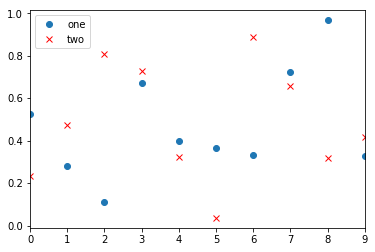

In [101]:
print ("Number of days average price difference was positive:", sum(final_sums['price_diff']>0))
import numpy as np
import pandas as pd

d = {'one' : np.random.rand(10),
     'two' : np.random.rand(10)}

df = pd.DataFrame(d)

df.plot(style=['o','rx'])

ValueError: view limit minimum -36875.98694711001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a179d3a60> (for post_execute):


ValueError: view limit minimum -36875.98694711001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

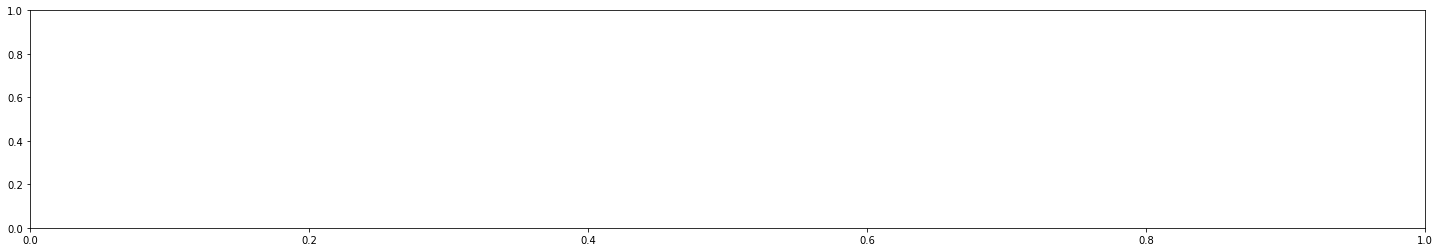

ValueError: view limit minimum -36875.98694711001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [111]:
# Examine overall price difference trend

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
final_sums.plot(kind='bar')
ax.set_xticklabels(final_sums['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Days When List Price Exceeded Average List Price for Individual AirBnbs')



In [88]:
# Subset the data for easier viewing 

fall = final_sums[(final_sums['datetime'] > '2015-09-22') & (final_sums['datetime'] < '2015-12-22')] 
winter = final_sums[(final_sums['datetime'] > '2015-12-21') | (final_sums['datetime'] < '2015-03-20')] 
spring = final_sums[(final_sums['datetime'] > '2015-03-19') & (final_sums['datetime'] < '2015-06-21')] 
summer = final_sums[(final_sums['datetime'] > '2015-06-20') & (final_sums['datetime'] < '2015-09-23')] 

In [89]:
# WINTER 

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
winter.plot(kind='bar', ax=ax)
ax.set_xticklabels(winter['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Winter')

ValueError: view limit minimum -36954.639772409115 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a179d3a60> (for post_execute):


ValueError: view limit minimum -36954.639772409115 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36954.639772409115 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [ ]:
# SUMMER 

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
summer.plot(kind='bar', ax=ax)
ax.set_xticklabels(summer['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Summer')

In [ ]:
#FALL

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
fall.plot(kind='bar', ax=ax)
ax.set_xticklabels(fall['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Fall')

In [ ]:
# SPRING

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
spring.plot(kind='bar', ax=ax)
ax.set_xticklabels(spring['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Spring')